In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn.cluster
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
color_hist = pd.read_pickle('/data/neon/customer_images/getty/camera_raws/2014 SBXLVII/colorname_originals.pkl')

In [6]:
color_hist.shape

(11, 23410)

Find clusters of image by the color histograms

In [3]:
# Jensen-Shannon divergence
# https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
from scipy.stats import entropy
from numpy.linalg import norm
def JSD(P, Q):
    epsilon = 2e-10
    P = np.array(P, dtype=float)
    Q = np.array(Q, dtype=float)
    new_P = P[P + Q > 0]
    new_Q = Q[P + Q > 0]
    if len(new_P) == 0 or len(new_Q) == 0:
        return 0
    new_P += epsilon
    new_Q += epsilon
    _P = new_P / norm(new_P, ord=1)
    _Q = new_Q / norm(new_Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_color = pca.fit_transform(color_hist.T)

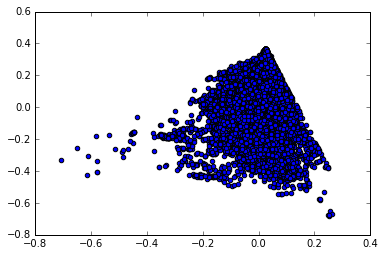

In [54]:
plt.scatter(pca_color[:,3], pca_color[:,1])
dists = [JSD(color_hist.ix[:,0], color_hist.ix[:,x]) for x in range(1,1000)]

-0.0

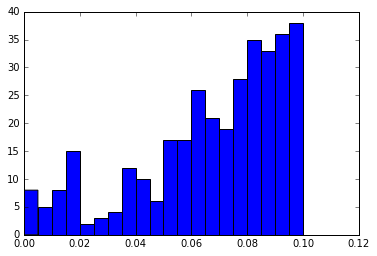

In [62]:
plt.hist(dists, 20, (0.0, 0.1))
min(dists)

In [4]:
cluster_alg = sklearn.cluster.DBSCAN(eps=0.005, min_samples=3, metric=JSD)
groups = cluster_alg.fit_predict(color_hist.T)

(array([ 16952.,    142.,    317.,    498.,    138.,     92.,    174.,
           119.,     83.,     99.,     43.,     48.,     32.,     38.,
            48.,     61.,     26.,     32.,     46.,     45.,     38.,
            23.,     33.,     64.,     98.,    259.,    113.,     53.,
            86.,     49.,    134.,     42.,    102.,     89.,    117.,
            83.,     61.,     40.,     52.,     47.,     42.,     74.,
            46.,    118.,     48.,     60.,     55.,     58.,     66.,
            54.,     61.,     41.,     51.,     57.,     33.,     28.,
            34.,     42.,     42.,     38.,     38.,     33.,     30.,
            29.,     34.,     29.,     26.,     24.,     23.,     54.,
            50.,     38.,     55.,     87.,     46.,     76.,    160.,
            81.,     67.,     48.,     78.,     37.,     37.,     31.,
            45.,     34.,     45.,     50.,     38.,     24.,     32.,
            30.,     49.,     28.,     37.,     24.,     24.,     24.,
      

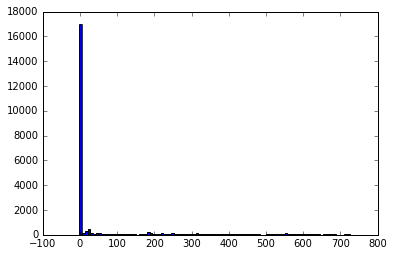

In [6]:
plt.hist(groups,100)

In [15]:
grps = pd.Series(groups, index=['/'.join(x.split('/')[8:]) for x in color_hist.columns])
grps

POD5/159140016_RC_8922_7F7C3FA9A129C9E58EF1B47331D319C4.JPG      0
POD5/159140016_RC_8941_284435F39C8E3249FADF796DFD96FF1E.JPG      1
POD5/159140016_RC_6873_0EE19C30709BF2DAF0899474C8616782.JPG      7
POD5/159140016_RC_6825_BBD4721EB5B7EAC5BB08364E78FD28CA.JPG      2
POD5/159140016_RC_8939_220FC0576189A30AAA8570FB534F8FE5.JPG      3
POD5/159140016_RC_6880_62DD3E5A02EF72CCBC2109504EA061FE.JPG      2
POD5/159140016_RC_6809_354B7745F1AB036DB849A1CDE960D3A6.JPG     -1
POD5/159140016_RC_8998_52FEC9BB4CD9EF3C8230FF75F9B3F17B.JPG      2
POD5/159140016_RC_8954_5A1F38463A3E74B745574A8E5AF9F717.JPG      1
POD5/159140016_RC_6889_023297986B9E38F9DC20CA412771CF95.JPG      2
POD5/159140016_RC_6851_9E7E0E642E8F24A8C908FA106CAE141E.JPG      2
POD5/159140016_RC_6837_10FE8956215469ABA2CF9A25041F9C50.JPG      2
POD5/159140016_RC_8993_2EF61B038E9010F3FC665A3D00188DDB.JPG      4
POD5/159140016_RC_6850_9C818FD5B06BEF4E489133EBD7E2A279.JPG      2
POD5/159140016_RC_6794_5895152FC85C94A32EDB8FF799619E30.JPG   

In [12]:
data = pd.read_pickle('/data/neon/customer_images/getty/camera_raws/2014 SBXLVII/score_choices.pkl')

In [16]:
data['groups'] = grps
data

,score,chosen,groups
POD5/159140016_RC_6873_0EE19C30709BF2DAF0899474C8616782.JPG,-0.372753,0.0,7
POD5/159140016_RC_8954_5A1F38463A3E74B745574A8E5AF9F717.JPG,-0.483712,0.0,1
POD5/159140016_RC_6889_023297986B9E38F9DC20CA412771CF95.JPG,-0.423810,0.0,2
POD5/159140016_RC_8941_284435F39C8E3249FADF796DFD96FF1E.JPG,-0.418824,0.0,1
POD5/159140016_RC_8922_7F7C3FA9A129C9E58EF1B47331D319C4.JPG,-0.448054,0.0,0
POD5/159140016_RC_8998_52FEC9BB4CD9EF3C8230FF75F9B3F17B.JPG,-0.404335,1.0,2
POD5/159140016_RC_6809_354B7745F1AB036DB849A1CDE960D3A6.JPG,-0.280545,0.0,-1
POD5/159140016_RC_6825_BBD4721EB5B7EAC5BB08364E78FD28CA.JPG,-0.342079,0.0,2
POD5/159140016_RC_6880_62DD3E5A02EF72CCBC2109504EA061FE.JPG,-0.404543,0.0,2
POD5/159140016_RC_8939_220FC0576189A30AAA8570FB534F8FE5.JPG,-0.393349,0.0,3


In [32]:
group_ranks = data.groupby('groups').apply(lambda x: x['score'].rank(ascending=False))
group_ranks.index = group_ranks.index.droplevel(0)
data['group_rank'] = group_ranks

In [35]:
sorted_data = data.sort_values(['group_rank', 'score'], ascending=[True, False])
sorted_data

,score,chosen,groups,group_rank
POD2/159140016_RM_0323_004BB22D62F56ABE538538D15351E073.JPG,0.443854,0.0,-1,1.0
POD2/159140016_RM_0180_2C48DDB1DF947C63276B6B819B773720.JPG,0.395897,0.0,2,1.0
NYCLW3664/159140016_WM_0111_DA8800DB19985005BDE63EA151E5BD36.JPG,0.370987,0.0,532,1.0
POD4/159140016_CP_0370_B9D3BE8B6F29104B66628083D0F3E1EB.JPG,0.339607,0.0,240,1.0
POD2/159140016_RM_0242_08184FECC096B1AD52D2AB47FBB1E50D.JPG,0.306166,0.0,641,1.0
POD2/159140016_RM_2224_9EABBA464DE2E7F9EAD8BE59815CA9AF.JPG,0.291020,0.0,544,1.0
POD4/159140016_CP_0463_C93C72F7FFA88370AABCA979531CA66C.JPG,0.284789,0.0,449,1.0
POD2/159140016_RM_9980_35D6ED5B7C560184D8E8631A72071E06.JPG,0.284395,0.0,633,1.0
POD4/159140016_CP_9919_6C551B5FB5951532234319D2BE9850B0.JPG,0.283263,0.0,462,1.0
POD4/159140016_CP_0934_4368760CE8CDC6F0B344396307E43682.JPG,0.279262,0.0,183,1.0


In [46]:
non_noisy = sorted_data[sorted_data['groups'] != -1]

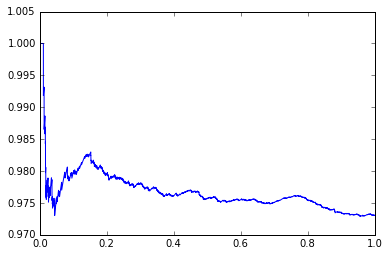

In [69]:
precision, recall, thresh = sklearn.metrics.precision_recall_curve(sorted_data['chosen'], np.arange(sorted_data.shape[0]), 0)
plt.plot(recall, precision)
#plt.ylim([0.0, 0.1])

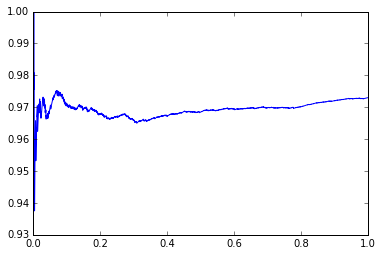

In [70]:
precision, recall, thresh = sklearn.metrics.precision_recall_curve(sorted_data['chosen'], sorted_data['score'], 0)
plt.plot(recall, precision)
#plt.ylim([0.0, 0.1])